Naive_bayes Classificatio\
1.Multinominal Naive Bayes\
2.Gaussian Naive Bayes\
*wordcloud\
*stemming\
*stopwords\
*Using Countvectorizer\
*prediction Acccuracy with Tfidf and without Tfidf

In [77]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Hamspam.csv",encoding= 'ISO-8859-1', low_memory=False)


In [78]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [79]:
#checking null value in dataframe
data.isnull().sum()

type    0
text    0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


Data Cleaning

In [81]:
import re # regular expression 
import string

In [82]:
def clean_text(text):
  '''Make text lowercase, remove text in square brackets, remove punctution and remove words containing bumners.'''
  text=text.lower()
  text=re.sub('\[."?\]','',text)
  text=re.sub("[%s]"% re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub('[0-9'']+','= =',text)
  text=re.sub('[''""_]','',text)
  return text
clean=lambda x: clean_text(x)  

In [83]:
data['text']=data.text.apply(clean)
data.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [84]:
#word frequrncy
freq=pd.Series(''.join(data['text']).split()).value_counts()[:20]  #for top 20

In [85]:
freq

to      2239
you     1924
i       1891
a       1419
the     1292
u       1161
and      946
is       866
in       863
my       724
me       704
for      694
your     637
of       615
have     553
call     547
it       538
on       518
that     471
are      459
dtype: int64

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
#removing stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
data['text']=data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [88]:
data

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...
...,...,...
5554,ham,great role model giving much really wish day m...
5555,ham,awesome remember last time got somebody high f...
5556,spam,dont prize go another customer tc wwwtcbiz pol...
5557,spam,sms ac jsco energy high u may know ur leadersh...


In [89]:
#word frequency after removal of stopwords
freq_sw=pd.Series(' '.join(data['text']).split()).value_counts()[:20]
freq_sw

u       1298
call     577
im       462
ur       389
get      384
å£       293
dont     287
go       282
ok       278
free     275
know     257
like     244
ill      239
got      239
good     236
come     228
time     214
day      203
love     197
send     191
dtype: int64

In [90]:
#count vectoriser tell the frquency of the word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectoriser=CountVectorizer(min_df=1,max_df=0.9)
X=vectoriser.fit_transform(data['text'])
word_freq_df=pd.DataFrame({'term':vectoriser.get_feature_names(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
  word_freq_df.head(10)

,term,occurrences,frequency
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
5,aathiwhere,3,0.000065
6,ab,1,0.000022
7,abbey,1,0.000022
8,abdomen,1,0.000022
9,abeg,1,0.000022


N-**Gram**

In [92]:
#Bi-gram
def get_top_n2_words(corpus,n=None):
  vecl=CountVectorizer(ngram_range=(2,2) , #for tri-gram, put nqram_range=(3,3)
       max_features=2000).fit(corpus)
  bag_of_words=vecl.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vecl.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
  return words_freq[:n]     


In [93]:
top2_words=get_top_n2_words(data['text'],n=200)  # top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-gram','Freq']
top2_df.head()

,Bi-gram,Freq
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39


[Text(0, 0, 'please call'),
 Text(0, 0, 'call later'),
 Text(0, 0, 'ill call'),
 Text(0, 0, 'let know'),
 Text(0, 0, 'sorry ill'),
 Text(0, 0, 'dont know'),
 Text(0, 0, 'good morning'),
 Text(0, 0, 'po box'),
 Text(0, 0, 'call landline'),
 Text(0, 0, 'take care'),
 Text(0, 0, 'im going'),
 Text(0, 0, 'guaranteed call'),
 Text(0, 0, 'new year'),
 Text(0, 0, 'prize guaranteed'),
 Text(0, 0, 'ok lor'),
 Text(0, 0, 'pls send'),
 Text(0, 0, 'every week'),
 Text(0, 0, 'send stop'),
 Text(0, 0, 'good night'),
 Text(0, 0, 'im gonna')]

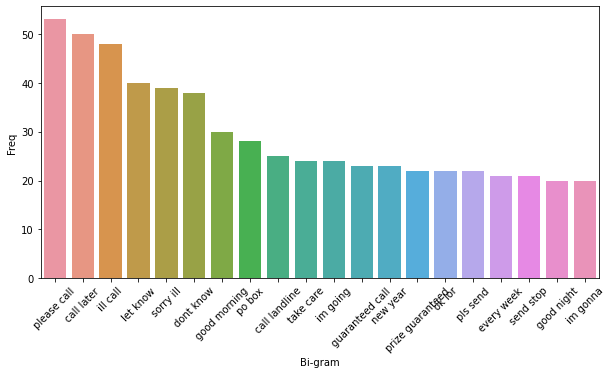

In [94]:
#Bi-Gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_bigram['Bi-gram'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram['Bi-gram'])

**WordCloud**


In [95]:
string_Total="".join(data['text'])

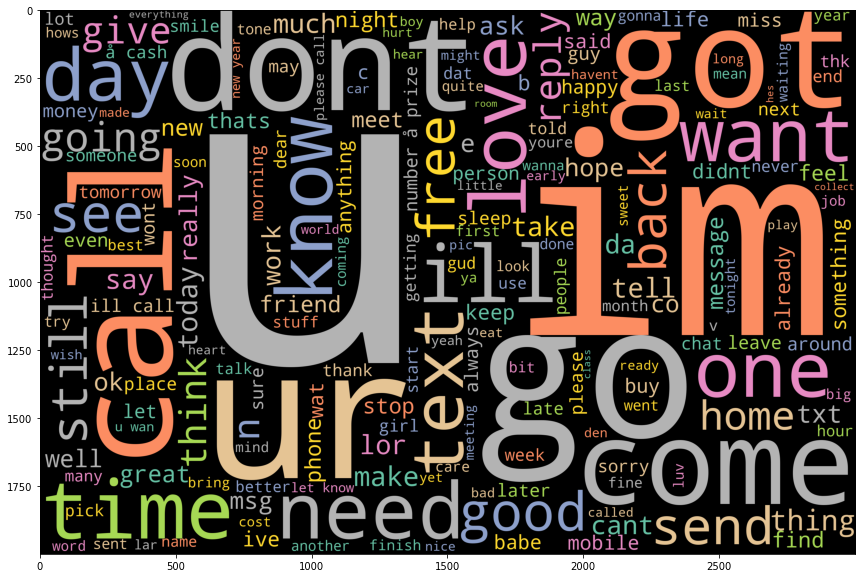

In [96]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
wordcloud_stw=WordCloud(
              background_color='black',
              width=3000,
              height=2000,
              colormap='Set2').generate(string_Total)
plt.imshow(wordcloud_stw);


Applying Naive bayes for classification

In [97]:
data.head()

,type,text
0,ham,hope good week checking
1,ham,kgive back thanks
2,ham,also cbe pay
3,spam,complimentary star ibiza holiday å£ cash needs...
4,spam,okmail dear dave final notice collect tenerife...


In [98]:
def split_into_words(i):
  return (i.split(" "))

In [99]:
from sklearn.model_selection import train_test_split
email_train,email_test=train_test_split(data,test_size=0.3)

In [100]:
email_test

,type,text
3902,ham,started dont stop pray good ideas anything see...
4684,ham,ok go change also
4295,ham,really quite funny lor wat u shd haf run short...
4459,ham,also wheres piece
4226,ham,ok watching tv
...,...,...
4118,ham,quite late lar ard anyway wun b drivin
2129,ham,yeshe really greatbhaji told kallis best crick...
2423,ham,networking technical support associate
1781,spam,married local women looking discreet action re...


In [101]:
 #preparing email texts into words count matrix format
 emails_bow=CountVectorizer(analyzer=split_into_words).fit(data.text)

In [102]:
emails_bow

CountVectorizer(analyzer=<function split_into_words at 0x7f10affcdb80>)

In [103]:
#for all message
all_emails_matrix=emails_bow.transform(email_train.text)
all_emails_matrix.shape

(3891, 8177)

In [104]:
#for training message
train_emails_matrix=emails_bow.transform(email_train.text)
train_emails_matrix.shape

(3891, 8177)

In [105]:
#for testing message
test_emails_matrix=emails_bow.transform(email_test.text)
test_emails_matrix.shape

(1668, 8177)

In [106]:
###Without TFIdf Matrics ######
#preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [107]:
#Multinonial Naive bayes
classifier_mb=MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m=classifier_mb.predict(train_emails_matrix)
accuracy_train_m=np.mean(train_pred_m==email_train.type)

test_pred_m=classifier_mb.predict(test_emails_matrix)
accuracy_test_m=np.mean(test_pred_m==email_test.type)


In [108]:
print("train  :" ,accuracy_train_m)
print("test :",accuracy_test_m)

train  : 0.9902338730403495
test : 0.9628297362110312


In [109]:
#Gaussian Naive bayes
classifier_gb=GB()
classifier_gb.fit(train_emails_matrix.toarray(),email_train.type.values) #we need to convert tfidf into array format which is compatible for gaussian naive.
train_pred_m=classifier_gb.predict(train_emails_matrix.toarray())
accuracy_train_m=np.mean(train_pred_m==email_train.type)

test_pred_m=classifier_gb.predict(test_emails_matrix.toarray())
accuracy_test_m=np.mean(test_pred_m==email_test.type)

In [110]:
print("train  :" ,accuracy_train_m)
print("test :",accuracy_test_m)

train  : 0.9521973785659213
test : 0.8920863309352518


**Using** **TFIDF**

In [113]:
from sklearn.feature_extraction.text import TfidfTransformer

#learning Term weighting and normalizing on etire emails
tfidf_transform=TfidfTransformer().fit(all_emails_matrix)

#preparing TFIDF for train emails
train_tfidf=tfidf_transform.transform(train_emails_matrix)

train_tfidf.shape

#preparing TFIDF for text emails
test_tfidf=tfidf_transform.transform(test_emails_matrix)
test_tfidf.shape

(1668, 8177)

In [115]:
#preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [118]:
#Multinominal Naive bayes
classifier_mb=MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m=classifier_mb.predict(train_tfidf)
accuracy_train_m=np.mean(train_pred_m==email_train.type)

test_pred_m=classifier_mb.predict(test_tfidf)
accuracy_test_m=np.mean(test_pred_m==email_test.type)

In [119]:
test_pred_m

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [120]:
accuracy_test_m

0.9622302158273381

In [121]:
#Gaussian Naive Bayes
classifier_gb=GB()
classifier_gb.fit(train_tfidf.toarray(),email_train.type)
train_pred_m=classifier_gb.predict(train_tfidf.toarray())
accuracy_train_m=np.mean(train_pred_m==email_train.type)

test_pred_m=classifier_mb.predict(test_tfidf.toarray())
accuracy_test_m=np.mean(test_pred_m==email_test.type)

In [122]:
test_pred_m

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [123]:
accuracy_test_m

0.9622302158273381